# Spatial Autocorrelation 

In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline 


In [2]:
gdf = gpd.read_file('data/powiaty-max.geojson')
gdf

,id,nazwa,geometry
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50..."
1,2,powiat łosicki,"MULTIPOLYGON (((22.72380 52.28040, 22.72380 52..."
2,3,powiat piaseczyński,"MULTIPOLYGON (((21.11010 52.11320, 21.10880 52..."
3,4,powiat radomski,"MULTIPOLYGON (((20.98910 51.48950, 20.98920 51..."
4,5,powiat sierpecki,"MULTIPOLYGON (((19.50880 52.86780, 19.50870 52..."
...,...,...,...
375,376,powiat Żory,"MULTIPOLYGON (((18.64180 50.06880, 18.64170 50..."
376,377,powiat nowodworski,"MULTIPOLYGON (((19.33020 54.36650, 19.33140 54..."
377,378,powiat jaworski,"MULTIPOLYGON (((16.19850 51.01200, 16.19850 51..."
378,379,powiat poznański,"MULTIPOLYGON (((16.60050 52.41220, 16.60040 52..."


In [15]:
df_vacc = pd.read_csv('data/dane_szczepien.csv', sep=';',
                      encoding='utf-8').groupby('powiat_nazwa').sum().reset_index()
df_vacc_filtered = df_vacc[['powiat_nazwa', 'powiat_teryt', 'liczba_ludnosci',
                            'w1_zaszczepieni_pacjenci', 'w3_zaszczepieni_pelna_dawka']]
gdf  = gpd.read_file("data/powiaty-max.geojson")

gdf['powiat_nazwa'] = gdf['nazwa'].apply(lambda x: x.split(' ')[-1])
df_vacc_filtered['czesc_wyszczepienia'] = df_vacc_filtered['w3_zaszczepieni_pelna_dawka'] / df_vacc_filtered['liczba_ludnosci']

print(df_distr.shape)
print(df_vacc_filtered.shape)

# df_tweet = pd.read_json('data/location_data_all_v2.json')
# geometry = [Point(xy) for xy in zip(df_tweet.longitude, df_tweet.latitude)]
# crs = {'init': 'epsg:4326'} 
# gdf_tweet = GeoDataFrame(df_tweet, crs=crs, geometry=geometry)

NameError: name 'df_distr' is not defined

In [4]:
gdf_tweet

,id,location,SentimentPL_clear_full_text_without_hashtags,SentimentPL_clear_full_text_with_hashtags,SentimentPL_raw_full_text,y3classes_numeric,y3classes_str,coordinate,latitude,longitude,country,y3classes_sum,y3classes_str_general,powiat_id,powiat_str,wojewodztwo_id,wojewodztwo_str,geometry
0,818507868370505728,"{'address': 'Lublin, województwo lubelskie, Po...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.250559, 22.5701022]",51.250559,22.570102,Polska,1,Zwolennicy,70,powiat Lublin,15,lubelskie,POINT (22.57010 51.25056)
1,826181970019352576,"{'address': 'Nałęczów, gmina Nałęczów, powiat ...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.2876064, 22.214792]",51.287606,22.214792,Polska,28,Zwolennicy,255,powiat puławski,15,lubelskie,POINT (22.21479 51.28761)
2,892091865994022912,"{'address': 'Wrocław, województwo dolnośląskie...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.1089776, 17.0326689]",51.108978,17.032669,Polska,175,Zwolennicy,33,powiat Wrocław,8,dolnośląskie,POINT (17.03267 51.10898)
3,160482101,"{'address': 'Wrocław, województwo dolnośląskie...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.1089776, 17.0326689]",51.108978,17.032669,Polska,11,Zwolennicy,33,powiat Wrocław,8,dolnośląskie,POINT (17.03267 51.10898)
4,2248032699,"{'address': 'Sobków, gmina Sobków, powiat jędr...",0.113673,0.113673,0.361539,1,Zwolennicy,"[50.6981874, 20.4559353]",50.698187,20.455935,Polska,25,Zwolennicy,232,powiat jędrzejowski,5,świętokrzyskie,POINT (20.45594 50.69819)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22744,1097714569,"{'address': 'Stary Sącz, gmina Stary Sącz, pow...",0.134435,0.079437,0.108639,1,Zwolennicy,"[49.5640268, 20.6366235]",49.564027,20.636623,Polska,1,Zwolennicy,104,powiat nowosądecki,10,małopolskie,POINT (20.63662 49.56403)
22745,1379741309787901959,"{'address': 'Polska', 'latitude': 52.215933, '...",-0.008995,-0.008995,0.028258,1,Zwolennicy,"[52.215933, 19.134422]",52.215933,19.134422,Polska,1,Zwolennicy,174,powiat kutnowski,13,łódzkie,POINT (19.13442 52.21593)
22747,1244925311524970496,"{'address': 'Poznań, powiat poznański, wojewód...",0.251241,0.251241,0.383423,-1,Przeciwnicy,"[52.4006632, 16.9197325918]",52.400663,16.919733,Polska,-1,Przeciwnicy,114,powiat Poznań,3,wielkopolskie,POINT (16.91973 52.40066)
22748,49009621,"{'address': 'Gorzów Wielkopolski, województwo ...",-0.331718,-0.327585,0.324044,1,Zwolennicy,"[52.7309926, 15.2400451]",52.730993,15.240045,Polska,1,Zwolennicy,259,powiat Gorzów Wielkopolski,16,lubuskie,POINT (15.24005 52.73099)


In [5]:
sj_gdf = gpd.sjoin(gdf, gdf_tweet, how='inner', op='intersects', lsuffix='left', rsuffix='right')
sj_gdf.head()

,id_left,nazwa,geometry,index_right,id_right,location,SentimentPL_clear_full_text_without_hashtags,SentimentPL_clear_full_text_with_hashtags,SentimentPL_raw_full_text,y3classes_numeric,...,coordinate,latitude,longitude,country,y3classes_sum,y3classes_str_general,powiat_id,powiat_str,wojewodztwo_id,wojewodztwo_str
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",20112,782194772794540032,"{'address': 'Iwierzyce, gmina Iwierzyce, powia...",-0.212365,-0.220741,-0.151979,1,...,"[50.0308446, 21.7554136]",50.030845,21.755414,Polska,1,Zwolennicy,1,powiat ropczycko-sędziszowski,9,podkarpackie
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",13473,2637829482,"{'address': 'Ropczyce, gmina Ropczyce, powiat ...",-0.926915,-0.883587,-0.365941,-1,...,"[50.0528608, 21.6116324]",50.052861,21.611632,Polska,-2,Przeciwnicy,1,powiat ropczycko-sędziszowski,9,podkarpackie
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",5410,1248545665896140800,"{'address': 'Ropczyce, gmina Ropczyce, powiat ...",-0.008995,-0.008995,0.100910,-1,...,"[50.0528608, 21.6116324]",50.052861,21.611632,Polska,-1,Przeciwnicy,1,powiat ropczycko-sędziszowski,9,podkarpackie
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",13156,989219144624234496,"{'address': 'Sędziszów Małopolski, gmina Sędzi...",-0.412318,-0.192454,-0.044114,-1,...,"[50.0715996, 21.7007524]",50.071600,21.700752,Polska,-6,Przeciwnicy,1,powiat ropczycko-sędziszowski,9,podkarpackie
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",13752,2949796359,"{'address': 'Sędziszów Małopolski, gmina Sędzi...",-0.008995,-0.008995,0.046109,1,...,"[50.0715996, 21.7007524]",50.071600,21.700752,Polska,1,Zwolennicy,1,powiat ropczycko-sędziszowski,9,podkarpackie


In [6]:
median_stance = sj_gdf['y3classes_str_general'].groupby([sj_gdf['nazwa']]).count()

In [7]:
gdf = gdf.join(median_stance, on='nazwa')

In [8]:
gdf = gdf.rename(columns={'y3classes_str_general':'count_per_powiat'})
# gdf['count_per_powiat'] = gdf['count_per_powiat'].fillna((gdf['count_per_powiat'].mean()), inplace=True)

In [9]:
gdf

,id,nazwa,geometry,count_per_powiat
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50...",5.0
1,2,powiat łosicki,"MULTIPOLYGON (((22.72380 52.28040, 22.72380 52...",NaN
2,3,powiat piaseczyński,"MULTIPOLYGON (((21.11010 52.11320, 21.10880 52...",33.0
3,4,powiat radomski,"MULTIPOLYGON (((20.98910 51.48950, 20.98920 51...",11.0
4,5,powiat sierpecki,"MULTIPOLYGON (((19.50880 52.86780, 19.50870 52...",2.0
...,...,...,...,...
375,376,powiat Żory,"MULTIPOLYGON (((18.64180 50.06880, 18.64170 50...",10.0
376,377,powiat nowodworski,"MULTIPOLYGON (((19.33020 54.36650, 19.33140 54...",8.0
377,378,powiat jaworski,"MULTIPOLYGON (((16.19850 51.01200, 16.19850 51...",1.0
378,379,powiat poznański,"MULTIPOLYGON (((16.60050 52.41220, 16.60040 52...",35.0


In [10]:
gdf['count_per_powiat'].fillna((gdf['count_per_powiat'].mean()), inplace=True)

<AxesSubplot:>

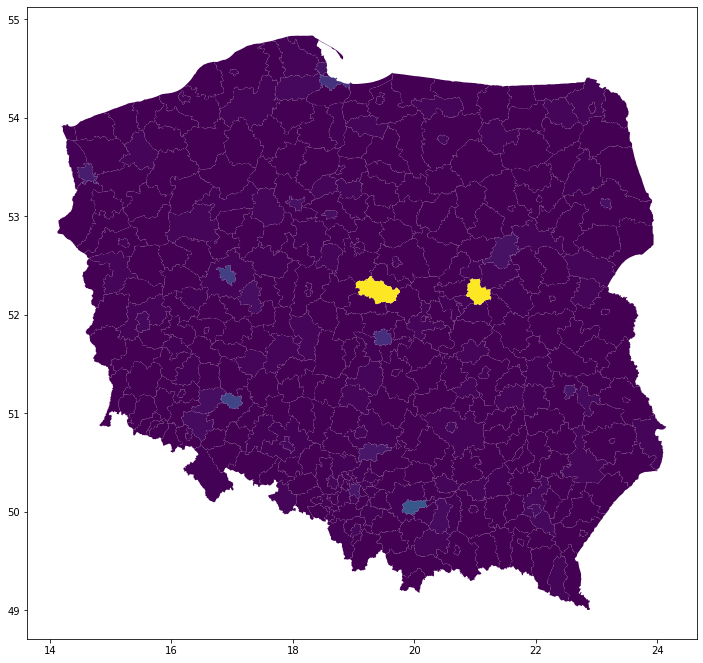

In [14]:
gdf.plot(column='count_per_powiat', figsize=(12,12))